In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [12]:
all_dfs = []
all_times = []
df_paths = ["../data/1st_test_full.pkl","../data/2nd_test_full.pkl","../data/3th_test_full.pkl"]
for i in df_paths:
    df = pd.read_pickle(i)
    df = df.abs()
    #df.index = pd.to_datetime(df.timestamp,unit='s')
    all_dfs.append(df)

# Average

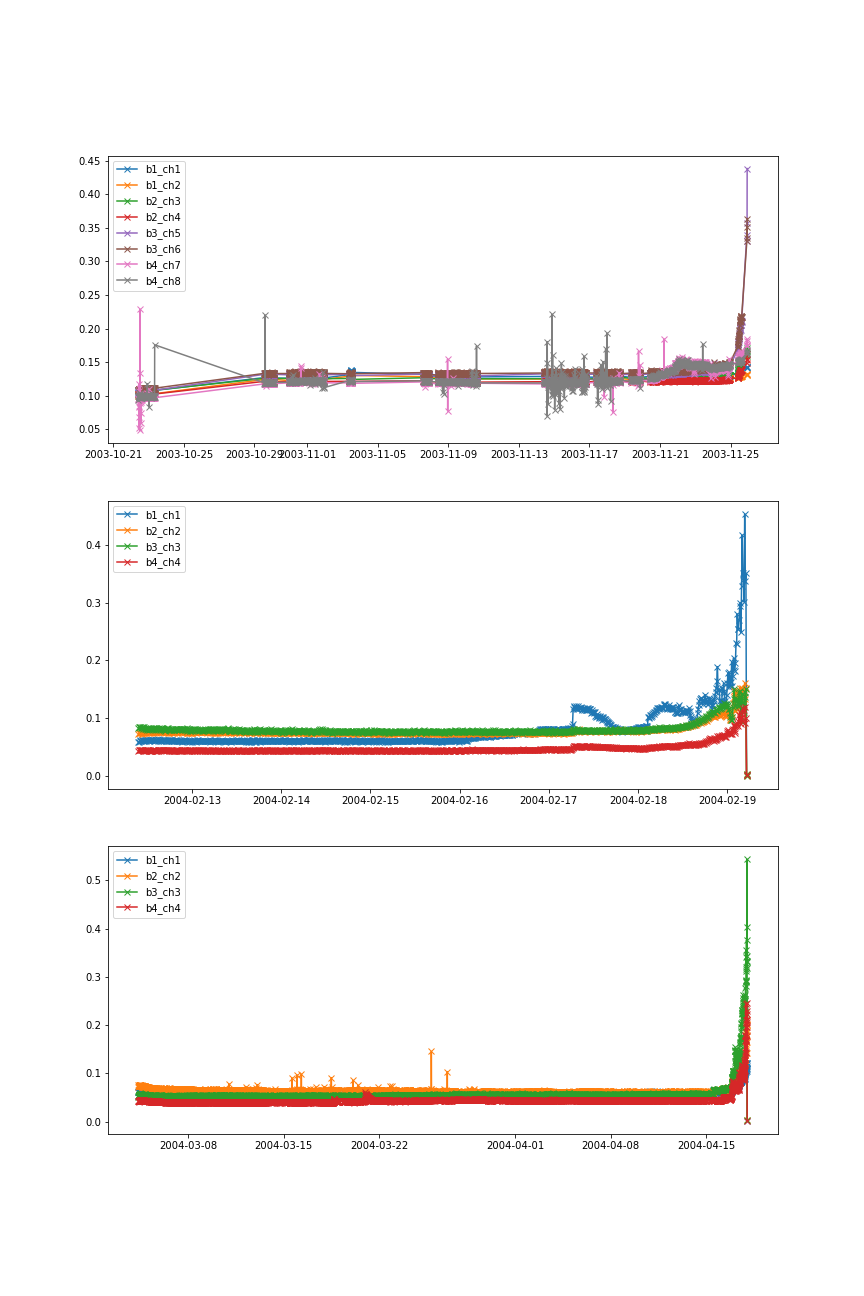

In [40]:
%matplotlib widget
fig,ax = plt.subplots(3,1,figsize = (12,18))
for index,i in enumerate(all_dfs):
    dfm = i.groupby("timestamp").mean()
    for j in dfm.columns:
        ax[index].plot(dfm[j],label = j,marker = "x")
        ax[index].legend()
    #ax[index].xaxis.set_major_formatter(myFmt)

# Variance 

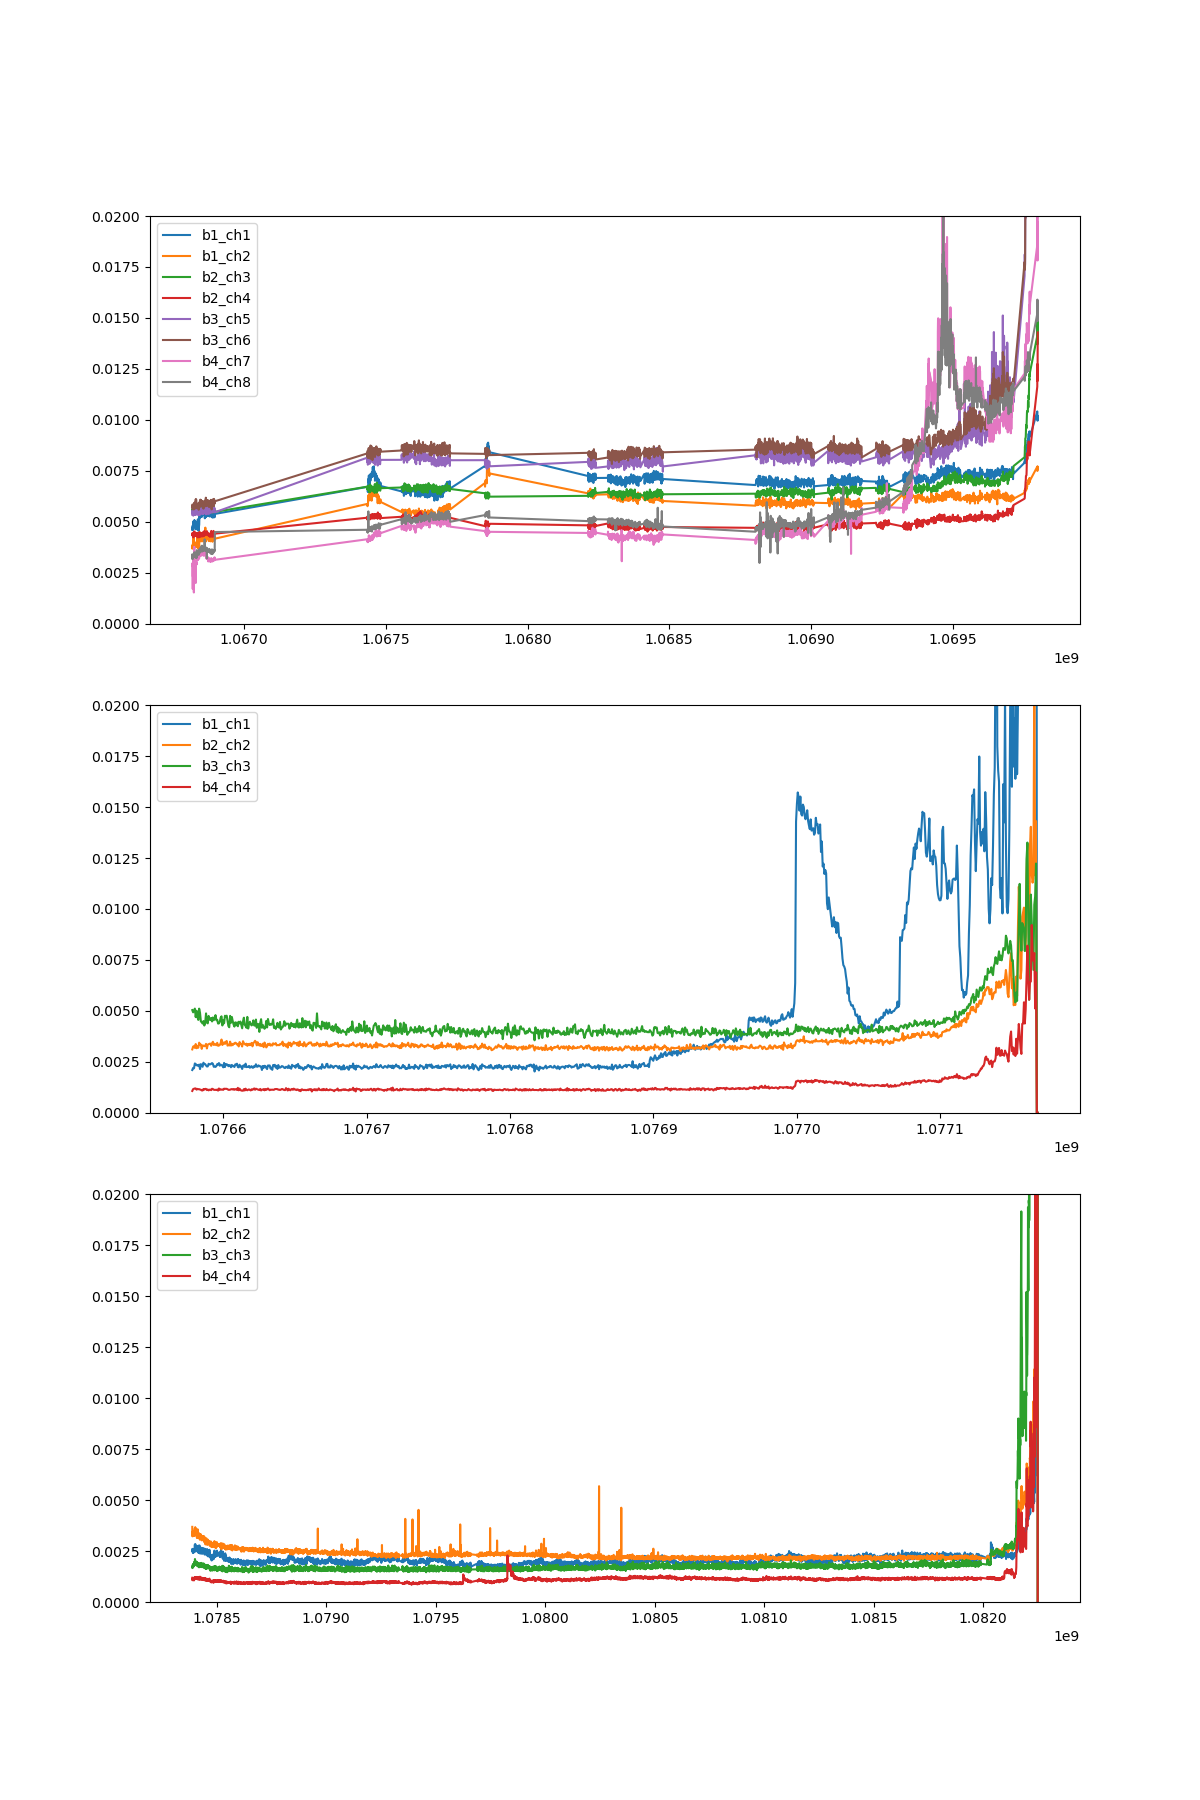

In [24]:
%matplotlib widget
fig,ax = plt.subplots(3,1,figsize = (12,18),sharey= True)
for index,i in enumerate(all_dfs):
    dfvar = i.groupby("timestamp").var()
    for j in dfvar.columns:
        ax[index].plot(dfvar[j],label = j)
        ax[index].legend()
        ax[index].set_ylim(0,0.02)

## Median

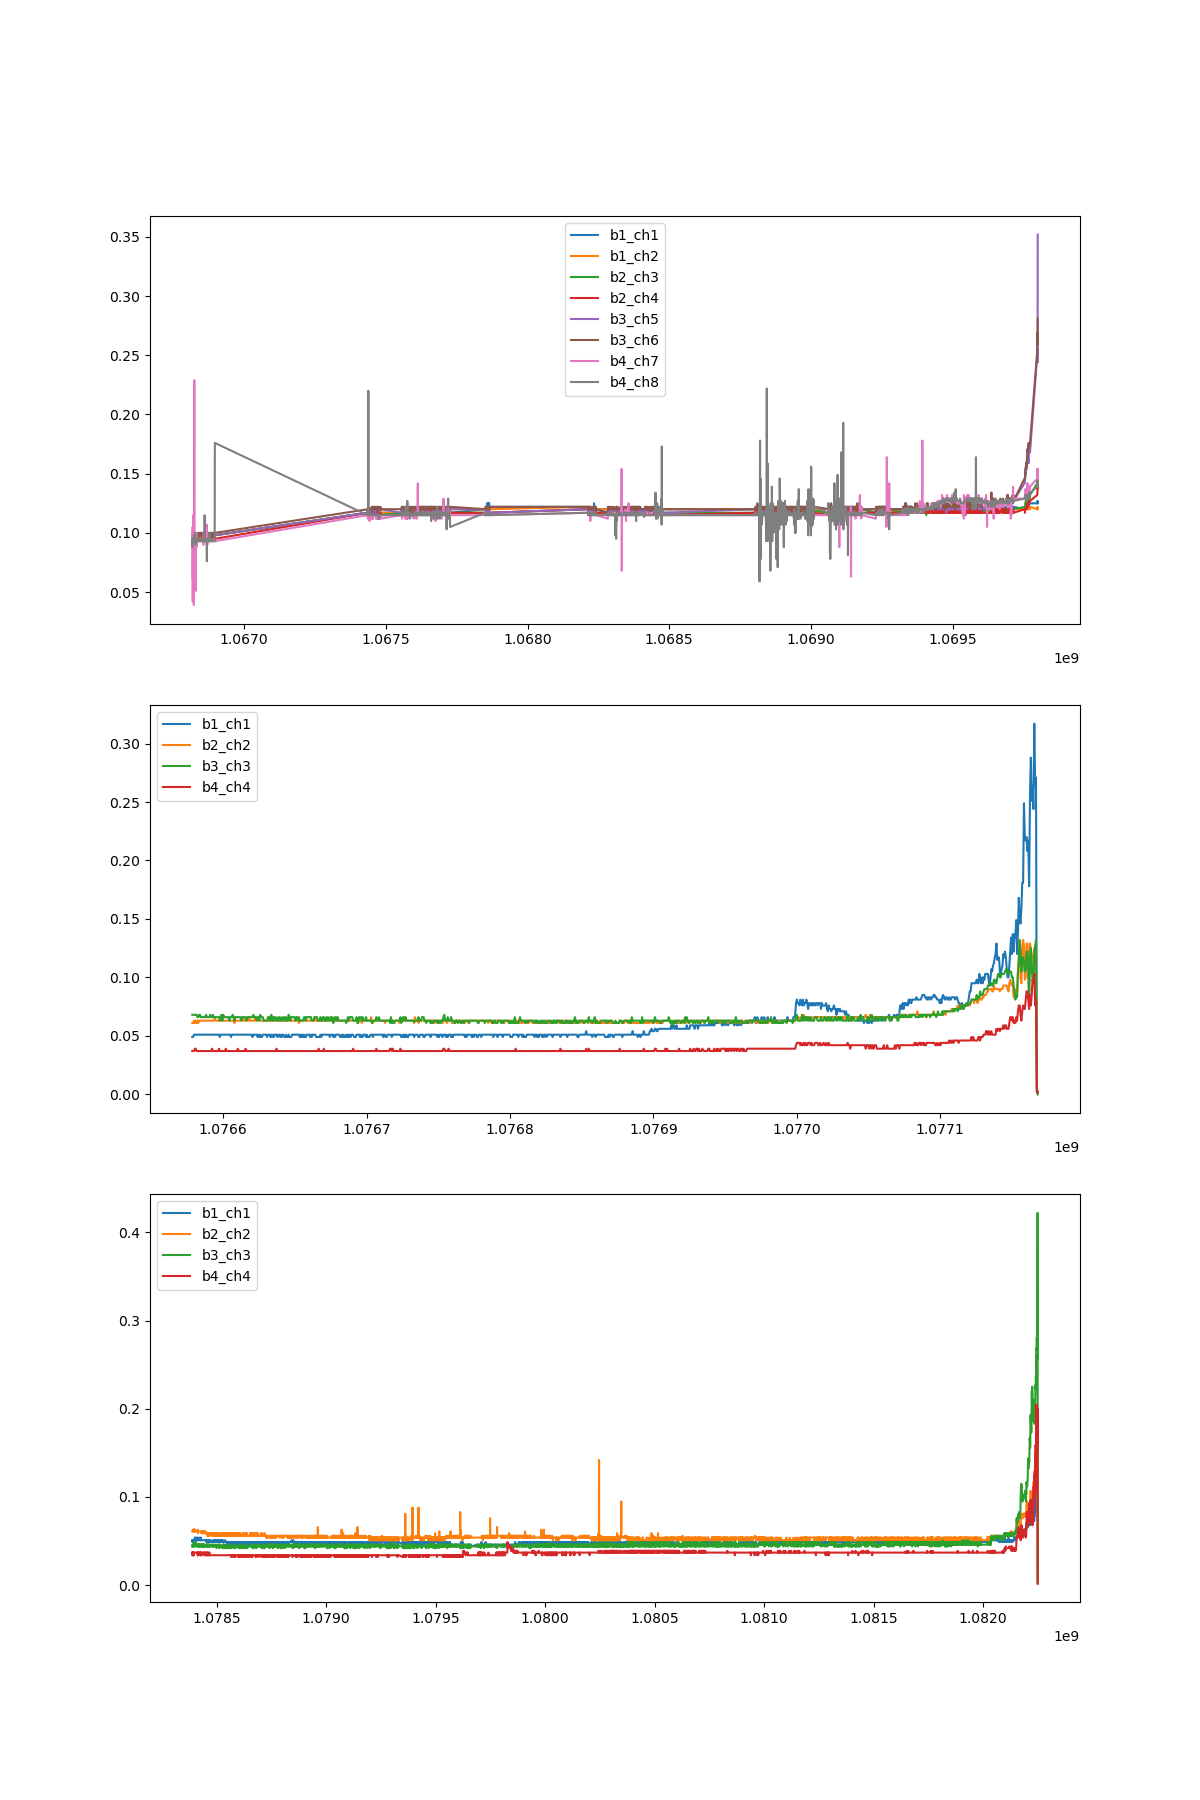

In [25]:
%matplotlib widget
fig,ax = plt.subplots(3,1,figsize = (12,18))
for index,i in enumerate(all_dfs):
    dfmm = i.groupby("timestamp").median()
    for j in dfmm.columns:
        ax[index].plot(dfmm[j],label = j)
        ax[index].legend()

## Kernel Density Estimation: Gaussian Kernel

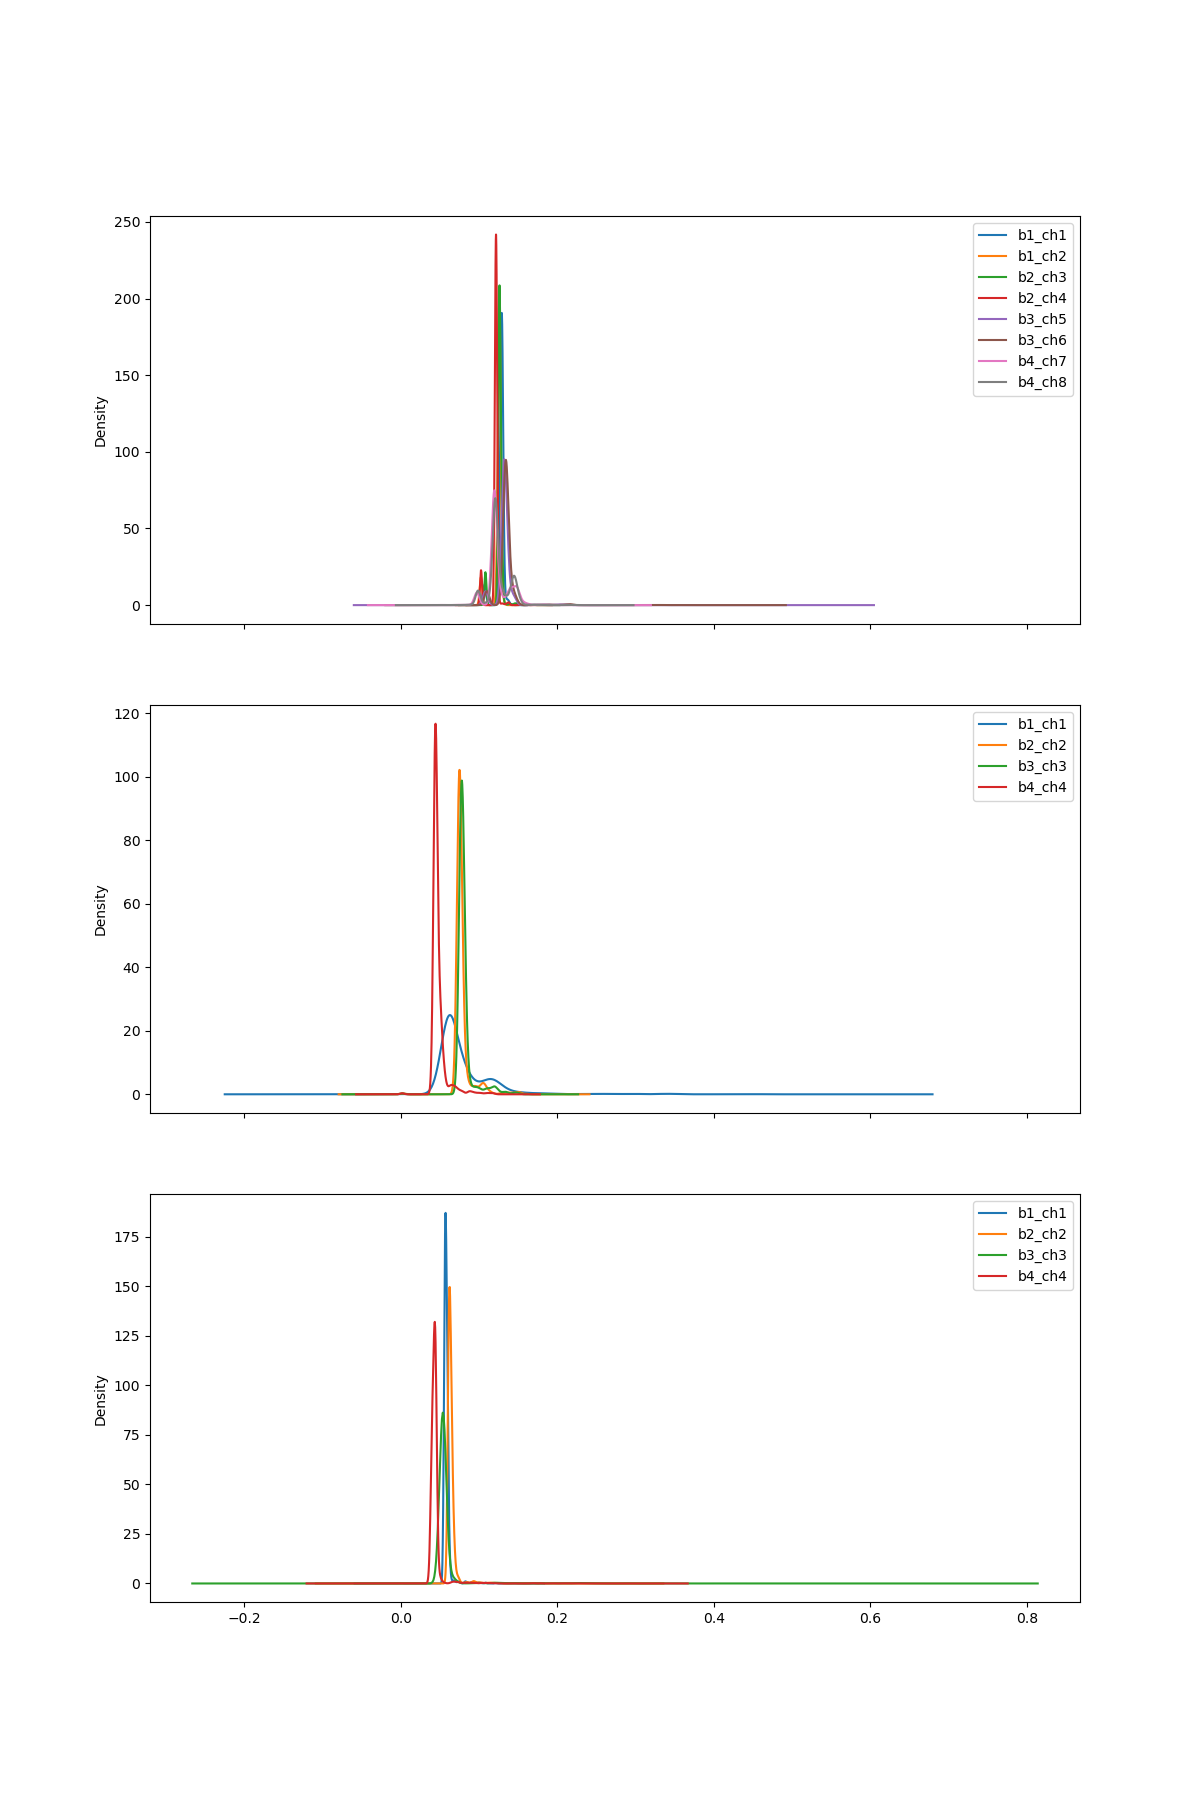

In [32]:
%matplotlib widget
fig, ax = plt.subplots(3,1,sharex=True,figsize = (12,18))
for index,i in enumerate(all_dfs):
    dfm = i.groupby("timestamp").mean()
    #dfvar = i.groupby("timestamp").var()
    dfm.plot.kde(ax = ax[index])

# Normal distribution

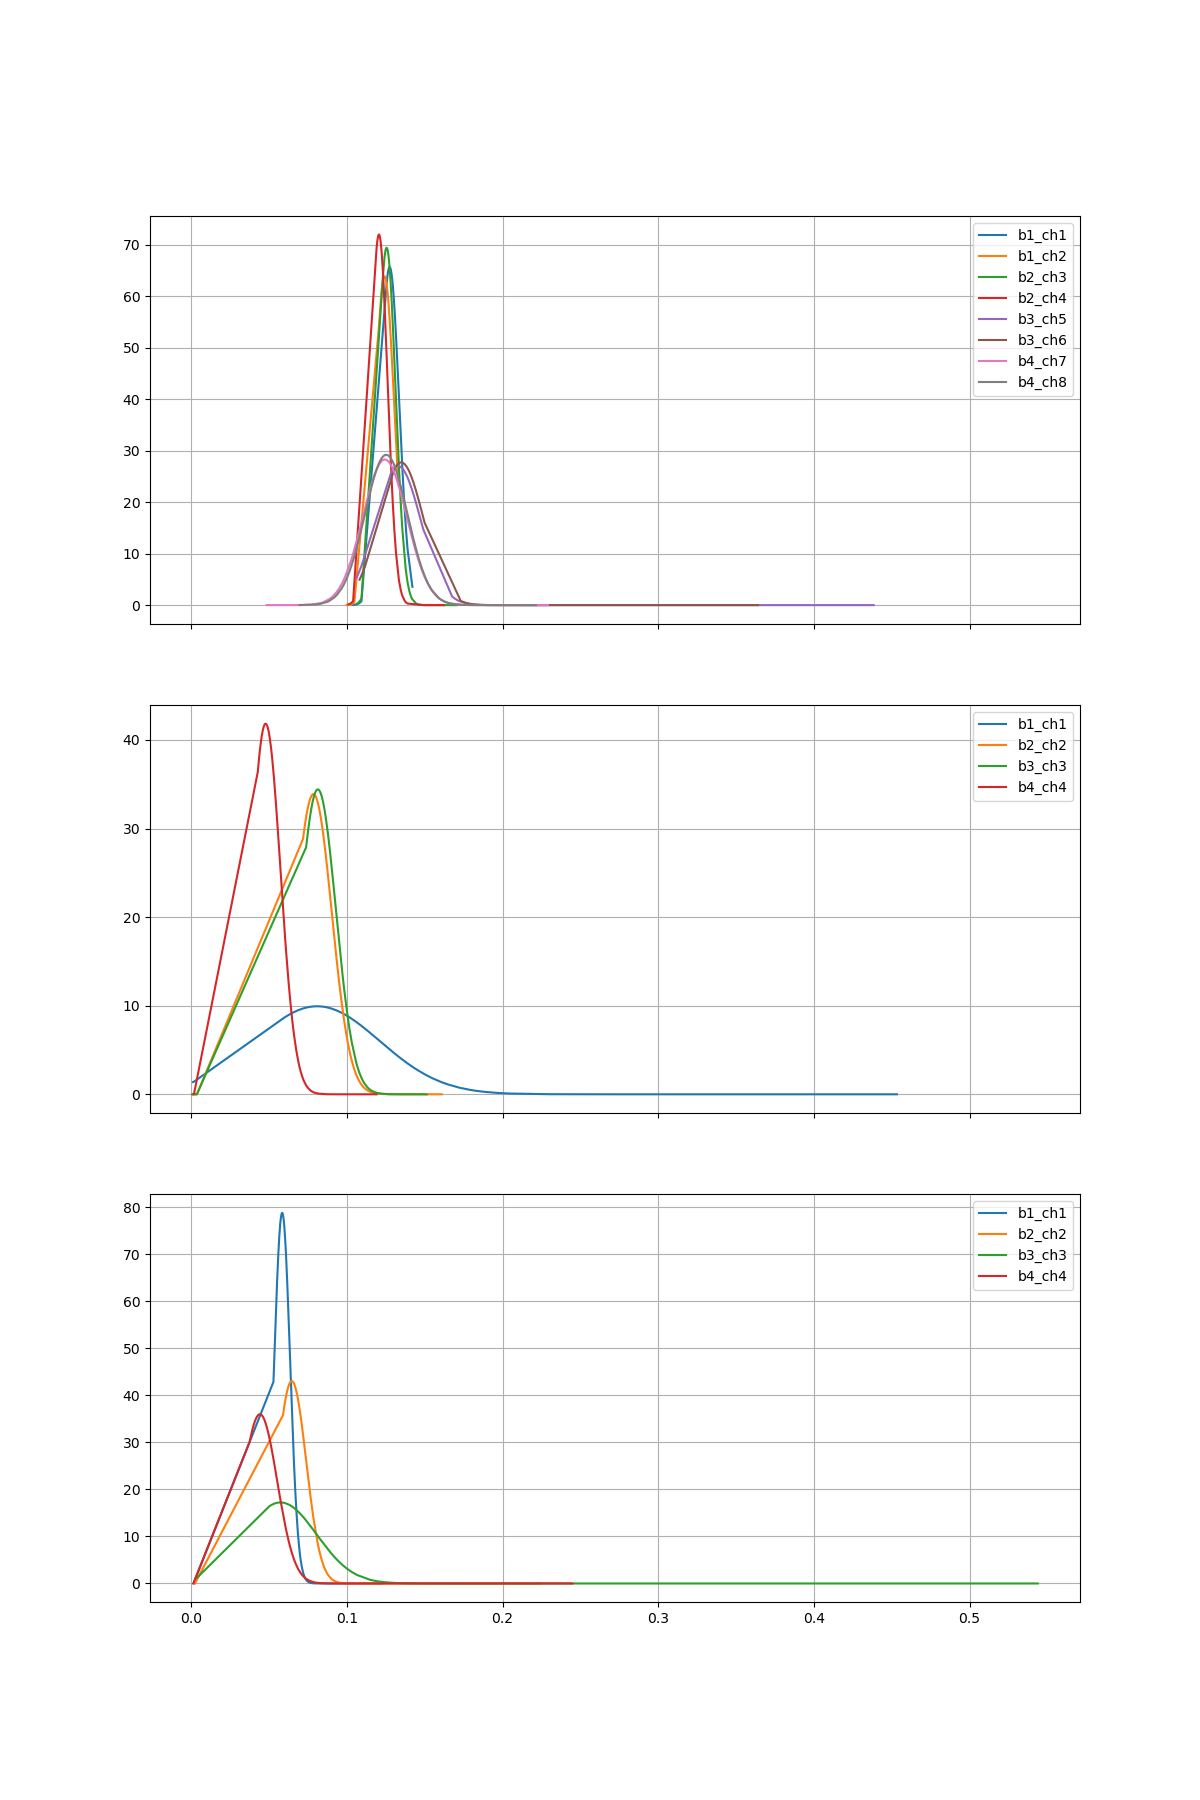

In [27]:
%matplotlib widget
fig, ax = plt.subplots(3,1,sharex=True,figsize = (12,18))
for index,i in enumerate(all_dfs):
    dfm = i.groupby("timestamp").mean()
    #dfvar = i.groupby("timestamp").var()
    for j in dfm.columns:
        samp = dfm[j].values
        samp.sort()
        fit = stats.norm.pdf(samp, 
                             np.mean(samp), 
                             np.std(samp))
        ax[index].plot(samp,fit,label = j)
        ax[index].legend()
        ax[index].grid(True)

## Rolling average of the data
This books show some rolling averages done to the data in order to smooth the peaks of the data.  
A comparision is shown between the regular data and the rolling average data.

'\nfig, ax = plt.subplots(figsize = (12,6))\nfor cols in df2.columns:\n    \n    ax.plot(df2[cols],label = cols)\n    ax.plot(df2[cols].rolling(window = period).mean(),label = cols+"_roll")\n    ax.legend()\n'

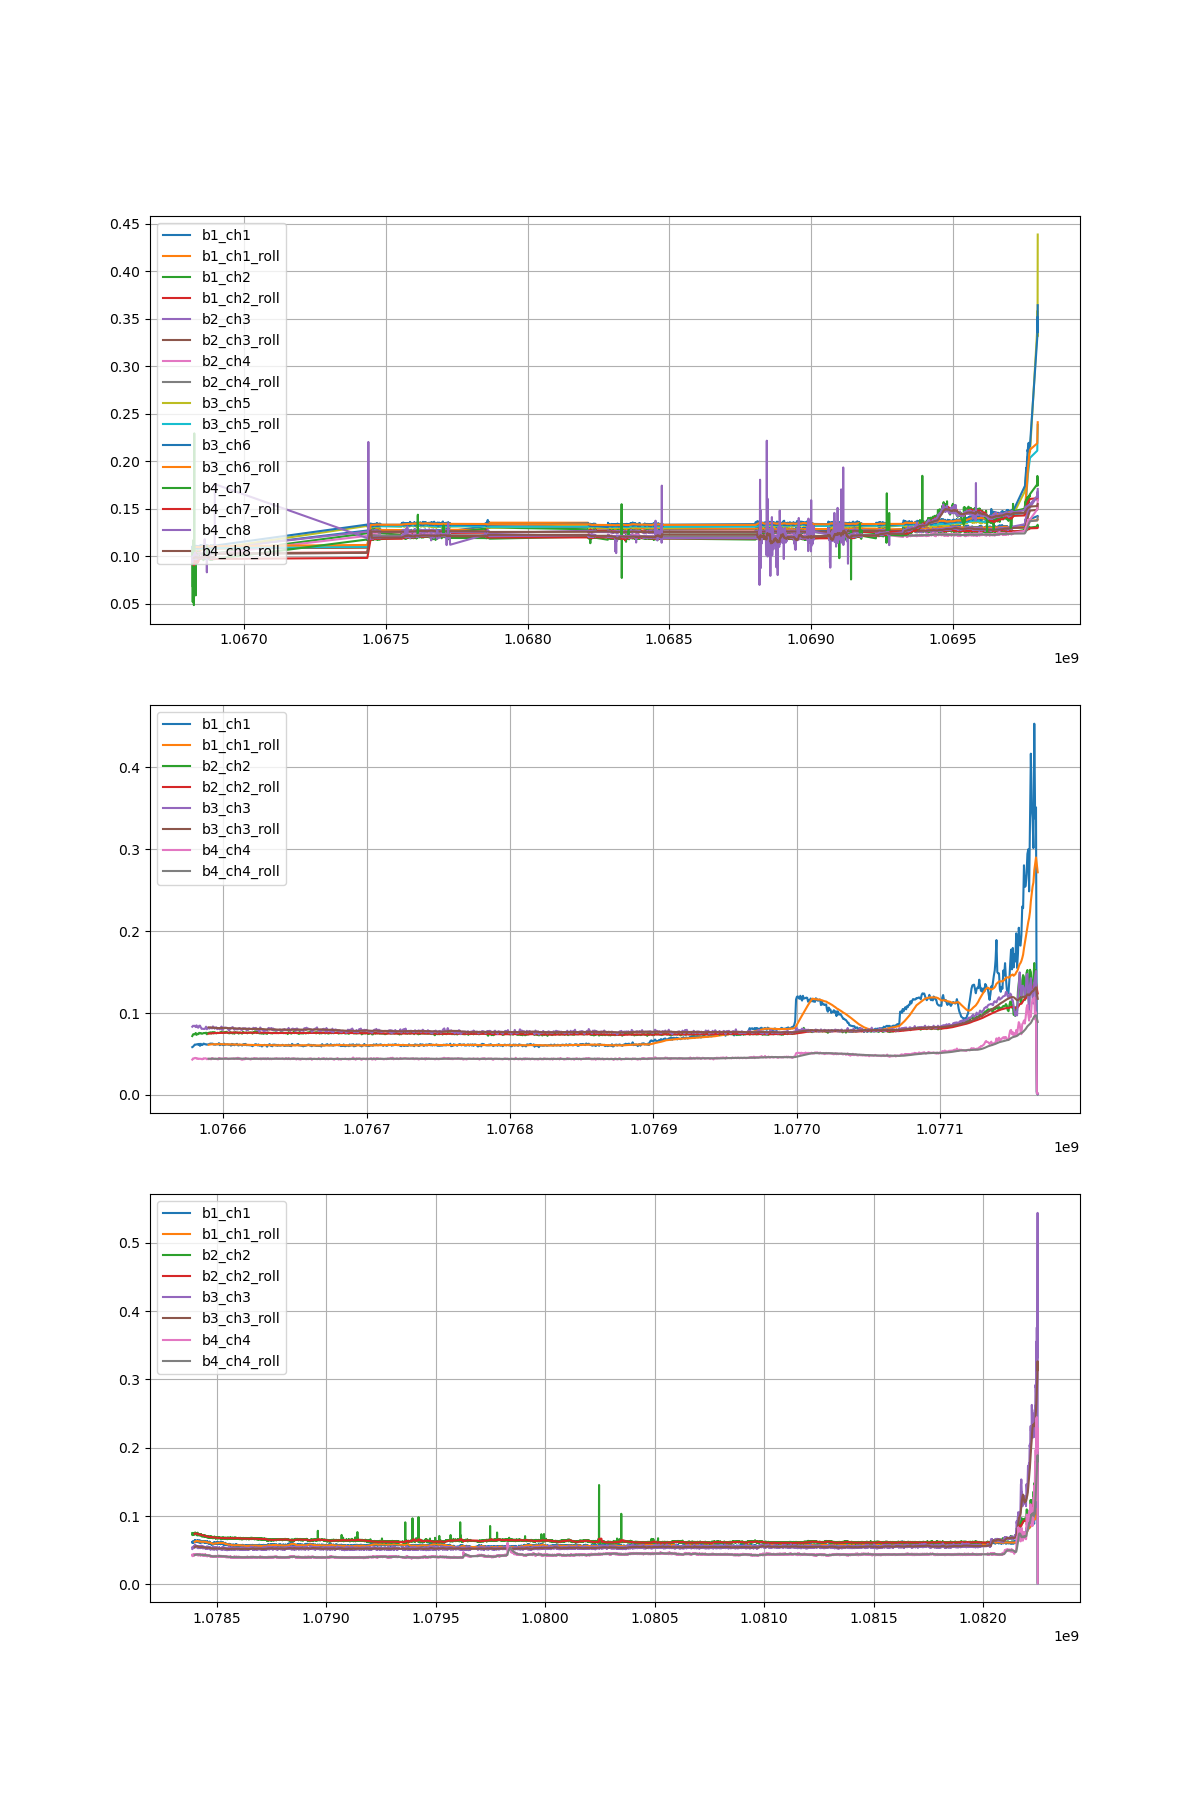

In [16]:
%matplotlib widget
period = 20
fig, ax = plt.subplots(3,1,figsize = (12,18))
for index,i in enumerate(all_dfs):
    dfm = i.groupby("timestamp").mean()
    #dfvar = i.groupby("timestamp").var()
    for j in dfm.columns:
        ax[index].plot(dfm[j],label = j)
        ax[index].plot(dfm[j].rolling(window = period).mean(),label = j+"_roll")
        ax[index].legend()
        ax[index].grid(True)

# Pre-processing the scaler for using the data

In [ ]:
scaler = p